Execution Time (in seconds) :
HOG :  0.06
CNN :  3.54


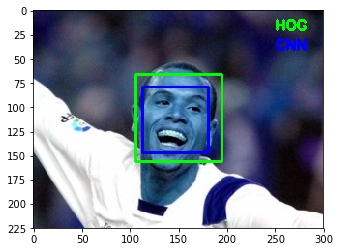

In [1]:
#import required packages
import cv2
import dlib
import time
import matplotlib.pyplot as plt


image = cv2.imread("player1.jpg")

if image is None:
    print("Could not read input image")
    exit()

# initialize hog + svm based face detector
hog_face_detector = dlib.get_frontal_face_detector()

# initialize cnn based face detector with the weights
cnn_face_detector = dlib.cnn_face_detection_model_v1('./mmod_human_face_detector.dat')

start = time.time()

# apply face detection (hog)
faces_hog = hog_face_detector(image, 1)

end = time.time()
print("Execution Time (in seconds) :")
print("HOG : ", format(end - start, '.2f'))

# loop over detected faces
for face in faces_hog:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # draw box over face
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)


start = time.time()

# apply face detection (cnn)
faces_cnn = cnn_face_detector(image, 1)

end = time.time()
print("CNN : ", format(end - start, '.2f'))

# loop over detected faces
for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

     # draw box over face
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)

# write at the top left corner of the image
# for color identification
img_height, img_width = image.shape[:2]
cv2.putText(image, "HOG", (img_width-50,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                (0,255,0), 2)
cv2.putText(image, "CNN", (img_width-50,40), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                (0,0,255), 2)

# display output image
plt.imshow( image)
plt.show()